### Joshua Campos
## Lab Course Machine Learning
# Exercise 6

---------

### 2. GLM's

We first import all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error

We define a general function to normalize our data. 

In [2]:
def normalize_dataframe(dataframe):
    return ((dataframe - dataframe.min())/(dataframe.max() - dataframe.min()))*1

We read our dataset and split it into independent and dependent variables, then we normalize our independent variables and add a bias.

In [26]:
wine_data = pd.read_csv('winequality-red.csv',sep=';')

X = normalize_dataframe(wine_data.drop('quality',axis=1))
bias = np.ones((len(X),1))
X.insert(0, 'bias', bias)

y = wine_data['quality']
print(X.describe())

         bias  fixed acidity  volatile acidity  citric acid  residual sugar  \
count  1599.0    1599.000000       1599.000000  1599.000000     1599.000000   
mean      1.0       0.329171          0.279329     0.270976        0.112247   
std       0.0       0.154079          0.122644     0.194801        0.096570   
min       1.0       0.000000          0.000000     0.000000        0.000000   
25%       1.0       0.221239          0.184932     0.090000        0.068493   
50%       1.0       0.292035          0.273973     0.260000        0.089041   
75%       1.0       0.407080          0.356164     0.420000        0.116438   
max       1.0       1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.125988             0.209506              0.142996     0.490211   
std       0.078573             0.147326              0

We split our independent and dependent variables into training and testing sets. 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### A. Ordinary Least Squares

We define our OLS Regression Model using the SGD Regressor, by configuring the necessary parameters. After that, we run our model for 100 iterations, using a starting step size of 0.1, and then plot the RMSE for our training and testing set. 

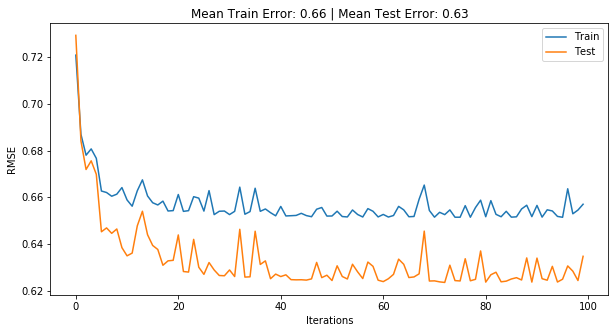

In [5]:
ols_regression = SGDRegressor(penalty='none',eta0=0.1)

train_error_arr_1 = []
test_error_arr_1 = []

for i in range(100):
    ols_regression.partial_fit(X_train,y_train)
    y_pred_train = ols_regression.predict(X_train)
    y_pred_test = ols_regression.predict(X_test)
    train_error = np.sqrt(mean_squared_error(y_train,y_pred_train))
    test_error = np.sqrt(mean_squared_error(y_test,y_pred_test))
    train_error_arr_1.append(train_error)
    test_error_arr_1.append(test_error)
    
mean_train_error = round(np.mean(train_error_arr_1),2)
mean_test_error = round(np.mean(test_error_arr_1),2)
    
plt.figure(figsize=[10,5])
plt.plot(train_error_arr_1,label='Train')
plt.plot(test_error_arr_1,label='Test')
plt.title('Mean Train Error: {} | Mean Test Error: {}'.format(mean_train_error,mean_test_error))
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

We define another OLS Regression Model using the SGD Regressor, by configuring the necessary parameters. After that, we run our model for 100 iterations, using a starting step size of 0.01, and then plot the RMSE for our training and testing set. 

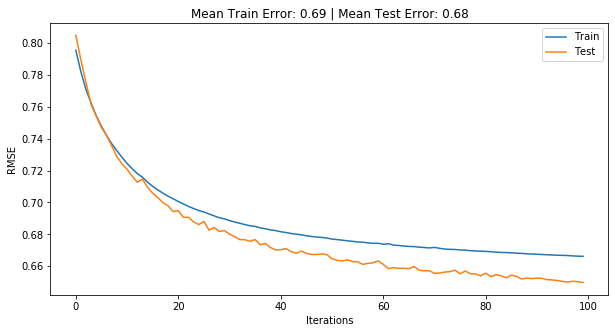

In [6]:
ols_regression = SGDRegressor(penalty='none',eta0=0.01)

train_error_arr_2 = []
test_error_arr_2 = []

for i in range(100):
    ols_regression.partial_fit(X_train,y_train)
    y_pred_train = ols_regression.predict(X_train)
    y_pred_test = ols_regression.predict(X_test)
    train_error = np.sqrt(mean_squared_error(y_train,y_pred_train))
    test_error = np.sqrt(mean_squared_error(y_test,y_pred_test))
    train_error_arr_2.append(train_error)
    test_error_arr_2.append(test_error)
    
mean_train_error = round(np.mean(train_error_arr_2),2)
mean_test_error = round(np.mean(test_error_arr_2),2)
    
plt.figure(figsize=[10,5])
plt.plot(train_error_arr_2,label='Train')
plt.plot(test_error_arr_2,label='Test')
plt.title('Mean Train Error: {} | Mean Test Error: {}'.format(mean_train_error,mean_test_error))
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

We define another OLS Regression Model using the SGD Regressor, by configuring the necessary parameters. After that, we run our model for 100 iterations, using a starting step size of 0.001, and then plot the RMSE for our training and testing set. 

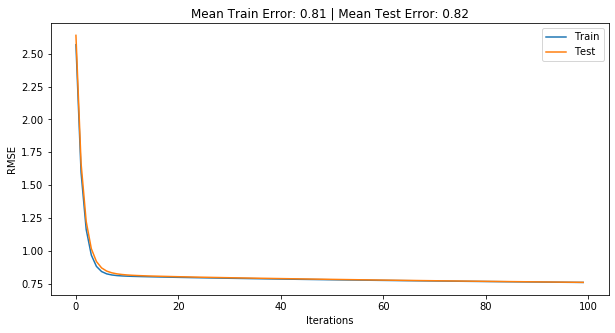

In [7]:
ols_regression = SGDRegressor(penalty='none',eta0=0.001)

train_error_arr_3 = []
test_error_arr_3 = []

for i in range(100):
    ols_regression.partial_fit(X_train,y_train)
    y_pred_train = ols_regression.predict(X_train)
    y_pred_test = ols_regression.predict(X_test)
    train_error = np.sqrt(mean_squared_error(y_train,y_pred_train))
    test_error = np.sqrt(mean_squared_error(y_test,y_pred_test))
    train_error_arr_3.append(train_error)
    test_error_arr_3.append(test_error)
    
mean_train_error = round(np.mean(train_error_arr_3),2)
mean_test_error = round(np.mean(test_error_arr_3),2)    
    
plt.figure(figsize=[10,5])
plt.plot(train_error_arr_3,label='Train')
plt.plot(test_error_arr_3,label='Test')
plt.title('Mean Train Error: {} | Mean Test Error: {}'.format(mean_train_error,mean_test_error))
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

Now we can plot all the previous RMSE plots together, so we can see and understand better the behavior of the model, using different step sizes, and the differences between the errors between the different parameters used.   

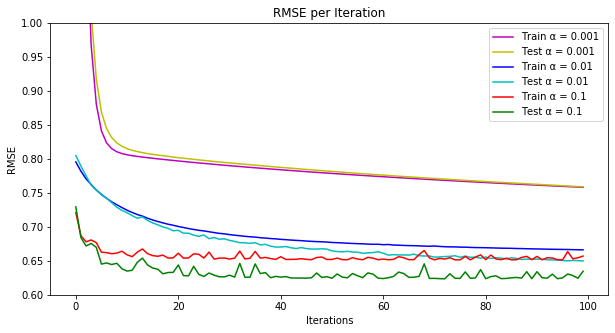

In [8]:
plt.figure(figsize=[10,5])
plt.plot(train_error_arr_3,label='Train α = 0.001',color='m')
plt.plot(test_error_arr_3,label='Test α = 0.001',color='y')
plt.plot(train_error_arr_2,label='Train α = 0.01',color='b')
plt.plot(test_error_arr_2,label='Test α = 0.01',color='c')
plt.plot(train_error_arr_1,label='Train α = 0.1',color='r')
plt.plot(test_error_arr_1,label='Test α = 0.1',color='g')
plt.title('RMSE per Iteration')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.ylim((0.6,1))
plt.legend()

**Comment**: By running our OLS Regression we can see that the best step size, from the ones we defined, is 0.1, having an RMSE of 0.66 and 0.63 for the training and testing set respectively. To better see the effects of regularization in the next implementations, we will keep the step size of 0.1. 

#### B. Ridge Regression

We define our Ridge Regression Model using the SGD Regressor, by configuring the necessary parameters. After that, we run our model for 100 iterations, using a starting step size of 0.1 and lambda of 0.0001, and then plot the RMSE for our training and testing set. 

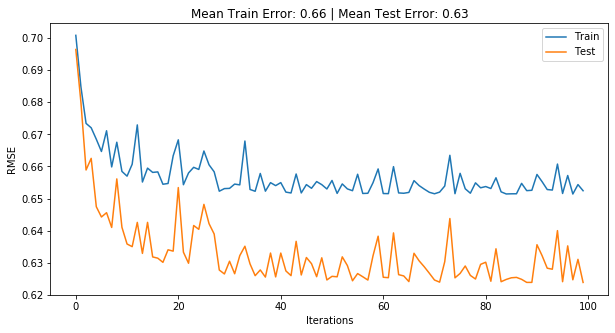

In [28]:
ridge_regression = SGDRegressor(penalty='l2',alpha=0.0001,eta0=0.1)

train_error_arr_4 = []
test_error_arr_4 = []

for i in range(100):
    ridge_regression.partial_fit(X_train,y_train)
    y_pred_train = ridge_regression.predict(X_train)
    y_pred_test = ridge_regression.predict(X_test)
    train_error = np.sqrt(mean_squared_error(y_train,y_pred_train))
    test_error = np.sqrt(mean_squared_error(y_test,y_pred_test))
    train_error_arr_4.append(train_error)
    test_error_arr_4.append(test_error)
    
mean_train_error = round(np.mean(train_error_arr_4),2)
mean_test_error = round(np.mean(test_error_arr_4),2)
    
plt.figure(figsize=[10,5])
plt.plot(train_error_arr_4,label='Train')
plt.plot(test_error_arr_4,label='Test')
plt.title('Mean Train Error: {} | Mean Test Error: {}'.format(mean_train_error,mean_test_error))
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

We define another Ridge Regression Model using the SGD Regressor, by configuring the necessary parameters. After that, we run our model for 100 iterations, using a starting step size of 0.1 and lambda of 0.001, and then plot the RMSE for our training and testing set. 

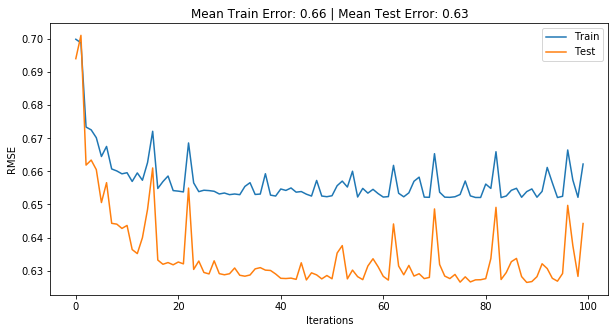

In [29]:
ridge_regression = SGDRegressor(penalty='l2',alpha=0.001,eta0=0.1)

train_error_arr_5 = []
test_error_arr_5 = []

for i in range(100):
    ridge_regression.partial_fit(X_train,y_train)
    y_pred_train = ridge_regression.predict(X_train)
    y_pred_test = ridge_regression.predict(X_test)
    train_error = np.sqrt(mean_squared_error(y_train,y_pred_train))
    test_error = np.sqrt(mean_squared_error(y_test,y_pred_test))
    train_error_arr_5.append(train_error)
    test_error_arr_5.append(test_error)
    
mean_train_error = round(np.mean(train_error_arr_5),2)
mean_test_error = round(np.mean(test_error_arr_5),2)    
    
plt.figure(figsize=[10,5])
plt.plot(train_error_arr_5,label='Train')
plt.plot(test_error_arr_5,label='Test')
plt.title('Mean Train Error: {} | Mean Test Error: {}'.format(mean_train_error,mean_test_error))
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

We define another Ridge Regression Model using the SGD Regressor, by configuring the necessary parameters. After that, we run our model for 100 iterations, using a starting step size of 0.1 and lambda of 0.01, and then plot the RMSE for our training and testing set. 

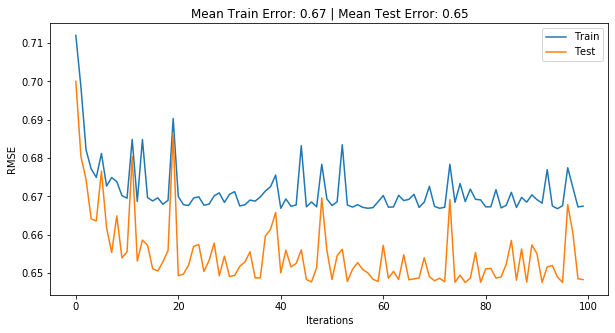

In [30]:
ridge_regression = SGDRegressor(penalty='l2',alpha=0.01,eta0=0.1)

train_error_arr_6 = []
test_error_arr_6 = []

for i in range(100):
    ridge_regression.partial_fit(X_train,y_train)
    y_pred_train = ridge_regression.predict(X_train)
    y_pred_test = ridge_regression.predict(X_test)
    train_error = np.sqrt(mean_squared_error(y_train,y_pred_train))
    test_error = np.sqrt(mean_squared_error(y_test,y_pred_test))
    train_error_arr_6.append(train_error)
    test_error_arr_6.append(test_error)
    
mean_train_error = round(np.mean(train_error_arr_6),2)
mean_test_error = round(np.mean(test_error_arr_6),2)  

plt.figure(figsize=[10,5])
plt.plot(train_error_arr_6,label='Train')
plt.plot(test_error_arr_6,label='Test')
plt.title('Mean Train Error: {} | Mean Test Error: {}'.format(mean_train_error,mean_test_error))
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

Now we can plot all the previous RMSE plots together, so we can see and understand better the behavior of the model, using different lambdas, and the differences between the errors between the different parameters used.

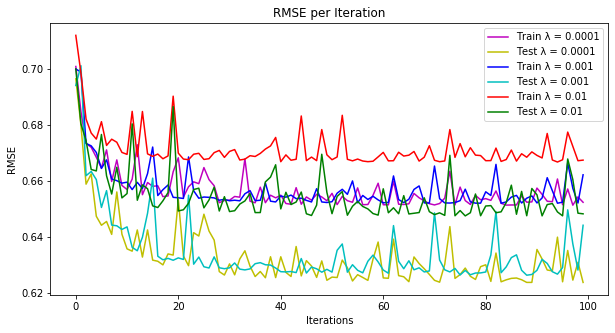

In [31]:
plt.figure(figsize=[10,5])
plt.plot(train_error_arr_4,label='Train λ = 0.0001',color='m')
plt.plot(test_error_arr_4,label='Test λ = 0.0001',color='y')
plt.plot(train_error_arr_5,label='Train λ = 0.001',color='b')
plt.plot(test_error_arr_5,label='Test λ = 0.001',color='c')
plt.plot(train_error_arr_6,label='Train λ = 0.01',color='r')
plt.plot(test_error_arr_6,label='Test λ = 0.01',color='g')
plt.title('RMSE per Iteration')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

**Comment**: By running our Ridge Regression we can see that the best lambda, from the ones we defined, is 0.0001, having an RMSE of 0.66 and 0.63 for the training and testing set respectively. Another lambda that basically had the same results is 0.001. 

#### C. Lasso Regression

We define our Lasso Regression Model using the SGD Regressor, by configuring the necessary parameters. After that, we run our model for 100 iterations, using a starting step size of 0.1 and lambda of 0.0001, and then plot the RMSE for our training and testing set.

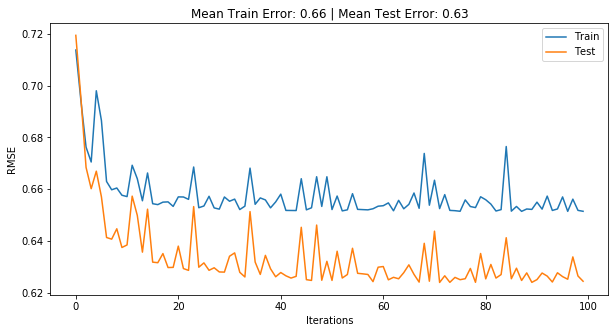

In [13]:
lasso_regression = SGDRegressor(penalty='l1',alpha=0.0001,eta0=0.1)

train_error_arr_7 = []
test_error_arr_7 = []

for i in range(100):
    lasso_regression.partial_fit(X_train,y_train)
    y_pred_train = lasso_regression.predict(X_train)
    y_pred_test = lasso_regression.predict(X_test)
    train_error = np.sqrt(mean_squared_error(y_train,y_pred_train))
    test_error = np.sqrt(mean_squared_error(y_test,y_pred_test))
    train_error_arr_7.append(train_error)
    test_error_arr_7.append(test_error)
    
mean_train_error = round(np.mean(train_error_arr_7),2)
mean_test_error = round(np.mean(test_error_arr_7),2)
    
plt.figure(figsize=[10,5])
plt.plot(train_error_arr_7,label='Train')
plt.plot(test_error_arr_7,label='Test')
plt.title('Mean Train Error: {} | Mean Test Error: {}'.format(mean_train_error,mean_test_error))
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

We define another Lasso Regression Model using the SGD Regressor, by configuring the necessary parameters. After that, we run our model for 100 iterations, using a starting step size of 0.1 and lambda of 0.001, and then plot the RMSE for our training and testing set.

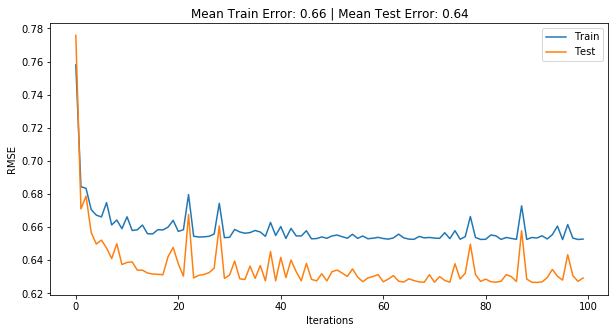

In [14]:
lasso_regression = SGDRegressor(penalty='l1',alpha=0.001,eta0=0.1)

train_error_arr_8 = []
test_error_arr_8 = []

for i in range(100):
    lasso_regression.partial_fit(X_train,y_train)
    y_pred_train = lasso_regression.predict(X_train)
    y_pred_test = lasso_regression.predict(X_test)
    train_error = np.sqrt(mean_squared_error(y_train,y_pred_train))
    test_error = np.sqrt(mean_squared_error(y_test,y_pred_test))
    train_error_arr_8.append(train_error)
    test_error_arr_8.append(test_error)
    
mean_train_error = round(np.mean(train_error_arr_8),2)
mean_test_error = round(np.mean(test_error_arr_8),2)
    
plt.figure(figsize=[10,5])
plt.plot(train_error_arr_8,label='Train')
plt.plot(test_error_arr_8,label='Test')
plt.title('Mean Train Error: {} | Mean Test Error: {}'.format(mean_train_error,mean_test_error))
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

We define another Lasso Regression Model using the SGD Regressor, by configuring the necessary parameters. After that, we run our model for 100 iterations, using a starting step size of 0.1 and lambda of 0.01, and then plot the RMSE for our training and testing set.

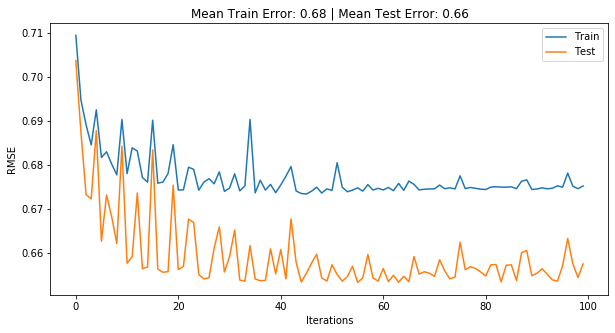

In [15]:
lasso_regression = SGDRegressor(penalty='l1',alpha=0.01,eta0=0.1)

train_error_arr_9 = []
test_error_arr_9 = []

for i in range(100):
    lasso_regression.partial_fit(X_train,y_train)
    y_pred_train = lasso_regression.predict(X_train)
    y_pred_test = lasso_regression.predict(X_test)
    train_error = np.sqrt(mean_squared_error(y_train,y_pred_train))
    test_error = np.sqrt(mean_squared_error(y_test,y_pred_test))
    train_error_arr_9.append(train_error)
    test_error_arr_9.append(test_error)
    
mean_train_error = round(np.mean(train_error_arr_9),2)
mean_test_error = round(np.mean(test_error_arr_9),2)
    
plt.figure(figsize=[10,5])
plt.plot(train_error_arr_9,label='Train')
plt.plot(test_error_arr_9,label='Test')
plt.title('Mean Train Error: {} | Mean Test Error: {}'.format(mean_train_error,mean_test_error))
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

Now we can plot all the previous RMSE plots together, so we can see and understand better the behavior of the model, using different lambdas, and the differences between the errors between the different parameters used.

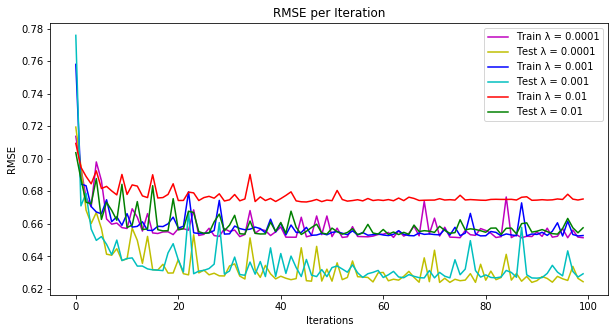

In [16]:
plt.figure(figsize=[10,5])
plt.plot(train_error_arr_7,label='Train λ = 0.0001',color='m')
plt.plot(test_error_arr_7,label='Test λ = 0.0001',color='y')
plt.plot(train_error_arr_8,label='Train λ = 0.001',color='b')
plt.plot(test_error_arr_8,label='Test λ = 0.001',color='c')
plt.plot(train_error_arr_9,label='Train λ = 0.01',color='r')
plt.plot(test_error_arr_9,label='Test λ = 0.01',color='g')
plt.title('RMSE per Iteration')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()

**Comment**: By running our Lasso Regression we can see that the best lambda, from the ones we defined, is also 0.0001, having an RMSE of 0.66 and 0.63 for the training and testing set respectively. Another lambda that basically had the same results as well is 0.001. 

----------

**Final Comment**: For this exercise, we ran several models, with and without regularization to see the differences each of them had. For this specific exercise, we didn't really see a big difference between the regularized and non-regularized models, at least in terms of RMSE. The best RMSE we got was 0.66 and 0.63 in the training and testing set respectively, which was achieved in all three models, OLS, Ridge and Lasso. 

__________

### Grid Search

We define a grid with the step sizes and lambdas we want to try in all our different models. Then, for each of the three models, we use the GridSearchCV to find the best parameter combination for each specific model. Once we have the best step size and lambda, we create a new model with those parameters and test its score using the cross_val_score function. 

In [17]:
grid = {'eta0':[0.1,0.01,0.001], 'alpha':[0.0001,0.001,0.01]}

#OLS REGRESSION
grid_search = GridSearchCV(ols_regression,grid)

grid_search.fit(X_train,y_train)
best_score = np.min(grid_search.cv_results_['mean_test_score'])
best_position = np.where(grid_search.cv_results_['mean_test_score'] == best_score)[0][0]
best_params = grid_search.cv_results_['params'][best_position]
best_alpha = best_params['alpha']
best_stepsize = best_params['eta0']

ols_regression_best = SGDRegressor(penalty='none',eta0=best_stepsize)
ols_cv_score = cross_val_score(ols_regression_best,X_train,y_train)

#RIDGE REGRESSION
grid_search = GridSearchCV(ridge_regression,grid)

grid_search.fit(X_train,y_train)
best_score = np.min(grid_search.cv_results_['mean_test_score'])
best_position = np.where(grid_search.cv_results_['mean_test_score'] == best_score)[0][0]
best_params = grid_search.cv_results_['params'][best_position]
best_alpha = best_params['alpha']
best_stepsize = best_params['eta0']

ridge_regression_best = SGDRegressor(penalty='l2',alpha=best_alpha,eta0=best_stepsize)
rr_cv_score = cross_val_score(ridge_regression_best,X_train,y_train)

#LASSO REGRESSION
grid_search = GridSearchCV(lasso_regression,grid)

grid_search.fit(X_train,y_train)
best_score = np.min(grid_search.cv_results_['mean_test_score'])
best_position = np.where(grid_search.cv_results_['mean_test_score'] == best_score)[0][0]
best_params = grid_search.cv_results_['params'][best_position]
best_alpha = best_params['alpha']
best_stepsize = best_params['eta0']

lasso_regression_best = SGDRegressor(penalty='l1',alpha=best_alpha,eta0=best_stepsize)
lr_cv_score = cross_val_score(lasso_regression_best,X_train,y_train)

D:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\Joshua\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING,

Once we have the scores for all the three models, using the best parameters for each, we plot a box plot to understand how these scores behave in comparison with each other. 

{'whiskers': [<matplotlib.lines.Line2D at 0x1dd321402e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd321409b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd32133ef0>,
 'medians': [<matplotlib.lines.Line2D at 0x1dd32140cc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1dd3214b3c8>,
 'means': []}

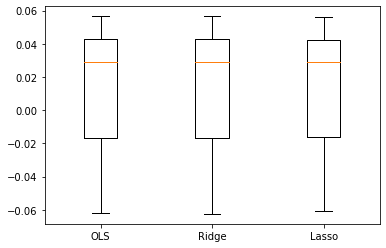

In [18]:
ols_cv_score = np.array(ols_cv_score).reshape(-1,1)
rr_cv_score = np.array(rr_cv_score).reshape(-1,1)
lr_cv_score = np.array(lr_cv_score).reshape(-1,1)
scores = np.concatenate((ols_cv_score,rr_cv_score,lr_cv_score),axis=1)
plt.boxplot(scores,labels=['OLS','Ridge','Lasso'])

**Comment**: After doing a Grid Search to find the best parameters for each model, we can see that the scores for the three of them are really similar with each other. This can mean that each model performed to its best once their optimal parameters were found. We should also take into account that even before doing the cross-validation, the models were performing relatively similar, but now we can confirm that. 

### 3. Polynomial Regression

We import all the new libraries that we will be using.

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

#### Non-Regularized Linear Regression

First, we create a random dataset by creating an 'X' with normal distribution and its respective 'y' with the given formula. After doing this, we fit a linear regression model to this dataset, but after each fit, we add a new polynomial feature so we can see how a higher degree linear regression behaves. For this exercise we created polynomial features of degrees 1, 4, 7 and 10, and then we plot the new fitted line to our data.  

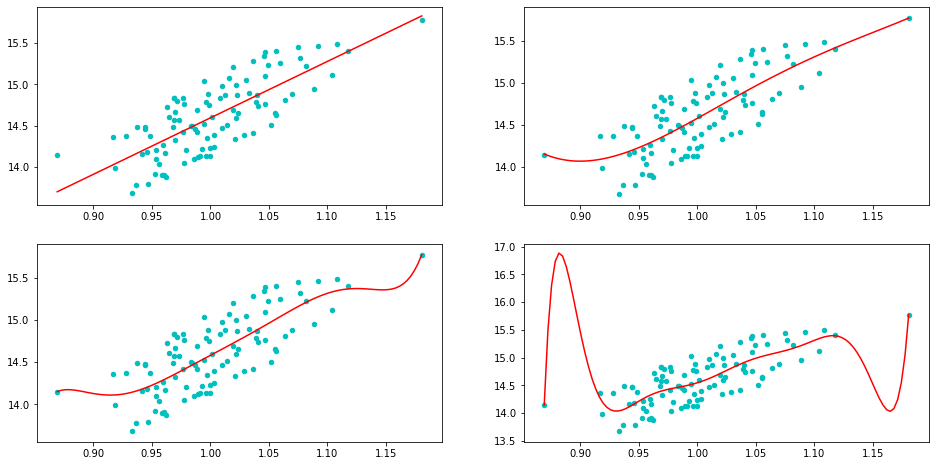

In [20]:
y_func = lambda X: 1.3*X**2 + 4.8*X + 8
psi = np.random.sample(100)

X = np.sort(np.random.normal(loc=1,scale=0.05,size=100))
y = y_func(X) + psi

plt.figure(figsize=[16,8])

plt.subplot(2,2,1)
polynomial_features = PolynomialFeatures(degree=1,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", 
                                                                   linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

X_test = np.linspace(np.min(X[:, np.newaxis]), np.max(X[:, np.newaxis]), 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color='r')
plt.scatter(X, y, s=20, color='c')

plt.subplot(2,2,2)
polynomial_features = PolynomialFeatures(degree=4,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", 
                                                                   linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

X_test = np.linspace(np.min(X[:, np.newaxis]), np.max(X[:, np.newaxis]), 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color='r')
plt.scatter(X, y, s=20, color='c')

plt.subplot(2,2,3)
polynomial_features = PolynomialFeatures(degree=7,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", 
                                                                   linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

X_test = np.linspace(np.min(X[:, np.newaxis]), np.max(X[:, np.newaxis]), 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color='r')
plt.scatter(X, y, s=20, color='c')

plt.subplot(2,2,4)
polynomial_features = PolynomialFeatures(degree=10,include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", 
                                                                   linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

X_test = np.linspace(np.min(X[:, np.newaxis]), np.max(X[:, np.newaxis]), 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color='r')
plt.scatter(X, y, s=20, color='c')

**Comment**: After fitting our linear regression with higher degrees, we can see how the fitted line tries to overfit the data, by having a more irregular shape each time and learn how the data behaves. 

-------------

#### Regularized Linear Regression

Now, instead of fitting a non-regularized linear model, we fit a ridge regression model, where we will use a constant polynomial feature of degree 10 and we will vary the lambda. This way we can see how the fitted line is regularized by the new model. After doing this, we plot the results. 

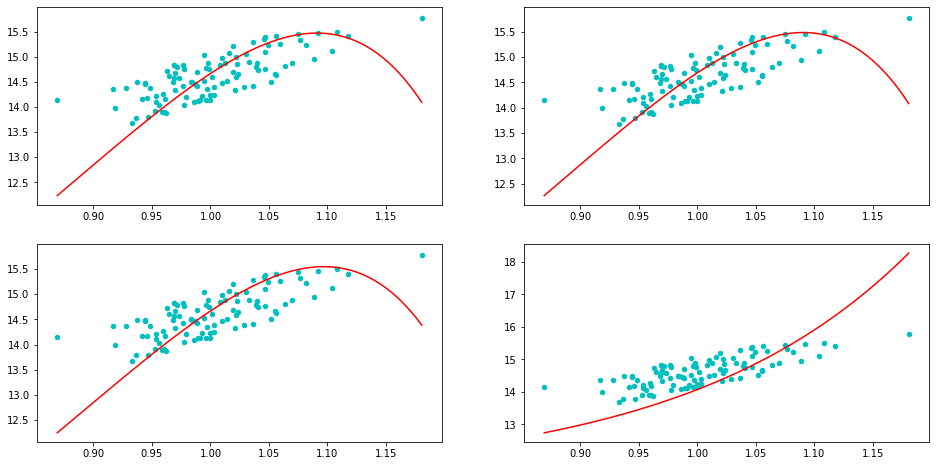

In [21]:
plt.figure(figsize=[16,8])

plt.subplot(2,2,1)
polynomial_features = PolynomialFeatures(degree=10,include_bias=False)
ridge_regression = SGDRegressor(alpha=0)
pipeline = Pipeline([("polynomial_features", polynomial_features),("ridge_regression", 
                                                                   ridge_regression)])
pipeline.fit(X[:, np.newaxis], y)

X_test = np.linspace(np.min(X[:, np.newaxis]), np.max(X[:, np.newaxis]), 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color='r')
plt.scatter(X, y, s=20, color='c')

plt.subplot(2,2,2)
polynomial_features = PolynomialFeatures(degree=10,include_bias=False)
ridge_regression = SGDRegressor(alpha=10**-6)
pipeline = Pipeline([("polynomial_features", polynomial_features),("ridge_regression", 
                                                                   ridge_regression)])
pipeline.fit(X[:, np.newaxis], y)

X_test = np.linspace(np.min(X[:, np.newaxis]), np.max(X[:, np.newaxis]), 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color='r')
plt.scatter(X, y, s=20, color='c')

plt.subplot(2,2,3)
polynomial_features = PolynomialFeatures(degree=10,include_bias=False)
ridge_regression = SGDRegressor(alpha=10**-2)
pipeline = Pipeline([("polynomial_features", polynomial_features),("ridge_regression", 
                                                                   ridge_regression)])
pipeline.fit(X[:, np.newaxis], y)

X_test = np.linspace(np.min(X[:, np.newaxis]), np.max(X[:, np.newaxis]), 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color='r')
plt.scatter(X, y, s=20, color='c')

plt.subplot(2,2,4)
polynomial_features = PolynomialFeatures(degree=10,include_bias=False)
ridge_regression = SGDRegressor(alpha=1)
pipeline = Pipeline([("polynomial_features", polynomial_features),("ridge_regression", 
                                                                   ridge_regression)])
pipeline.fit(X[:, np.newaxis], y)

X_test = np.linspace(np.min(X[:, np.newaxis]), np.max(X[:, np.newaxis]), 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), color='r')
plt.scatter(X, y, s=20, color='c')

**Comment**: After running our Ridge Regression model, we can see how it managed to regularize the fitted line. In the previous exercise, the polynomial of degree 10 had a fitted line of very irregular behavior, but after our Ridge Regression model, the fitted line looks more like a quadratic function, which is a simpler line. We can also see that when lambda is very small, in our case we used 0, 10e-6 and 10e-2, the model behaves the same way for the three of them. When we use a lambda of 1, the fitted line changes quite a bit. 

### 4. Coordinate Descent

Here we define three main functions for the exercise, the soft function, which defines how the regularization works; the 'minimize_cd' which implements Coordinate Descent; and 'learn_linreg_cd' which learns the model by creating the betas and calling the 'minimize_cd' function. 

In [22]:
def soft(beta,regularization):
    if beta > regularization:
        return beta - regularization
    elif abs(beta) <= regularization:
        return 0
    elif beta < -regularization:
        return beta + regularization

def minimize_cd(X,y,beta,reg_constant,max_iterations,l1_reg):
    features = X.columns
    y_true = np.array(y).reshape(-1,1)
    beta_hist = np.copy(beta.T)
    beta = pd.DataFrame(data=beta,columns=features)
    for i in range(max_iterations):
        for column in features:
            column_data = np.array(X[column]).reshape(-1,1)
            other_data = X.drop(column,axis=1)
            other_beta = np.array(beta.drop(column,axis=1)).reshape(-1,1)
            y_pred = np.dot(other_data,other_beta)
            loss = y_true-y_pred
            numerator = np.dot(loss.T, column_data)
            denominator = np.dot(column_data.T,column_data)
            beta[column] = numerator/denominator
            if l1_reg == True:
                regularization = (1/2*reg_constant)/denominator
                beta[column] = soft(beta[column].values,regularization)
        beta_hat = np.array(beta).reshape(-1,1)
        beta_hist = np.concatenate((beta_hist,beta_hat),axis=1)
    return (beta_hist,beta_hat)

def learn_linreg_cd(X,y,reg_constant,max_iterations,l1_reg):
    beta = np.zeros((1,len(X.columns)))
    beta_hist,beta_hat = minimize_cd(X,y,beta,reg_constant,max_iterations,l1_reg)
    return (beta_hist,beta_hat)

#### Non-Regularized Linear Regression

Here we run the 'learn_linreg_cd' function without regularization, and then plot the changes for the coefficients after each iteration. 

Text(0, 0.5, 'Coefficient Value')

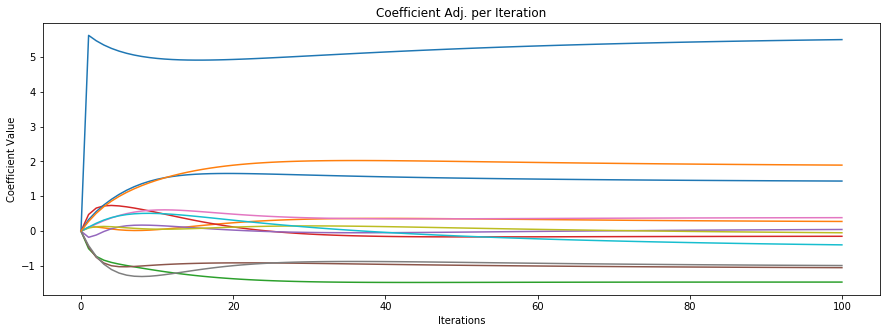

In [23]:
reg_constant = 0.5
max_iterations = 100
l1_reg = False
beta_hist,beta_hat = learn_linreg_cd(X_train,y_train,reg_constant,max_iterations,l1_reg)

plt.figure(figsize=[15,5])
plt.plot(beta_hist.T)
plt.title('Coefficient Adj. per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Coefficient Value')

**Comment**: In the plot, we can see how the coefficients change more drastically in the first 20 to 30 iterations, and then the changes is lower in the next iterations, until there is basically no change. 

#### Regularized Linear Regression

Here we run the 'learn_linreg_cd' function with regularization, using a lambda of 0.5, and then plot the changes for the coefficients after each iteration. 

Text(0, 0.5, 'Coefficient Value')

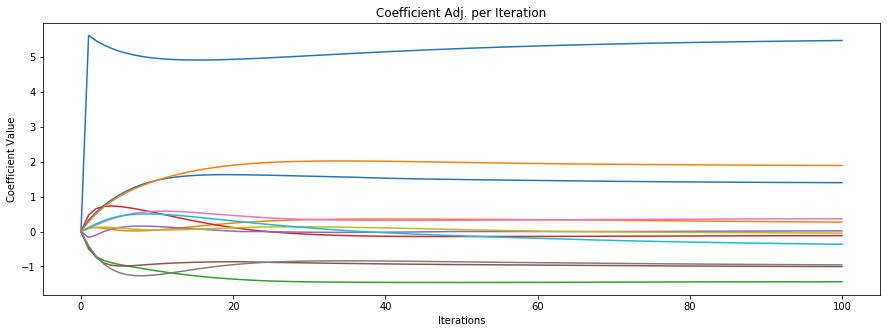

In [24]:
reg_constant = 0.5
max_iterations = 100
l1_reg = True
beta_hist,beta_hat = learn_linreg_cd(X_train,y_train,reg_constant,max_iterations,l1_reg)

plt.figure(figsize=[15,5])
plt.plot(beta_hist.T)
plt.title('Coefficient Adj. per Iteration')
plt.xlabel('Iterations')
plt.ylabel('Coefficient Value')

**Comment**: Similarly to the non-regularized model, we can see how the coefficients change more drastically in the first 20 to 30 iterations, and then the changes is lower in the next iterations, until there is basically no change. 

-------------

**Final Comment**: We know that with an L1 Regularization, some variables might become zero, but in this case it didn't happen. There is indeed a difference between the coefficients with and without regularization, but the change is too small to actually notice it in the graphs. For this exercise, there wasn't really a big effect of using an L1 Regularization versus a non-regularized linear model. 